<a href="https://colab.research.google.com/github/100477706/Proyecto2_Aprendizaje/blob/main/Clustering_27.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **0. IDENTIFICACI√ìN DE ESTUDIANTES**

---

**Grupo de Trabajo:** 27

Gabriel Jos√© Rivera Amor - 100477706@alumnos.uc3m.es

Santiago Jos√© D√≠az Rodr√≠guez - 100479095@alumnos.uc3m.es

**Enlace Github:** https://github.com/100477706/Proyecto2_Aprendizaje.git

# **1. CARGA DE DATOS**

---

Mediante este apartado realizamos la carga de datos al Google Collab teniendo en cuenta que en cada ingreso a la aplicaci√≥n se debe realizar la carga del dataset.

En este apartado se descomprime el archivo que se ha subido y se muestran los datos por pantalla.

In [ ]:
!ls

sample_data  semillas.csv


In [ ]:
!pip install scikit-learn
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from sklearn.metrics import silhouette_score, silhouette_samples

In [ ]:
df = pd.read_csv("semillas.csv", sep=",") #subir el archivo de semillas
df.head()

area  perimetro  compacidad  longitud  anchura  asimetria  surco  clase
0  15.26      14.84      0.8710     5.763    3.312      2.221  5.220      1
1  14.88      14.57      0.8811     5.554    3.333      1.018  4.956      1
2  14.29      14.09      0.9050     5.291    3.337      2.699  4.825      1
3  13.84      13.94      0.8955     5.324    3.379      2.259  4.805      1
4  16.14      14.99      0.9034     5.658    3.562      1.355  5.175      1

Como estamos haciendo un proceso de clustering, es necesario "eliminar" de los datos cargados dicha columna, ya que nosotros estamos buscando etiquetar a la clase a la que pertencen cada uno de los elementos.

In [ ]:
# Columna a eliminar para el clustering
delete_cols = ['clase']

# Retiramos la columna con la funci√≥n drop
df_c = df.drop(columns=delete_cols)

# Definimos la data a utilizar
X = df_c
y = df['clase']

# Mostramos nuevamenete el dataset para verificar que se ha eliminado la columna
df_c.head()

area  perimetro  compacidad  longitud  anchura  asimetria  surco
0  15.26      14.84      0.8710     5.763    3.312      2.221  5.220
1  14.88      14.57      0.8811     5.554    3.333      1.018  4.956
2  14.29      14.09      0.9050     5.291    3.337      2.699  4.825
3  13.84      13.94      0.8955     5.324    3.379      2.259  4.805
4  16.14      14.99      0.9034     5.658    3.562      1.355  5.175

# **2. PRINCIPAL COMPONENT ANALYSIS (PCA)**

---

El clustering es una t√©cnica de aprendizaje no supervisado, la cual consiste en organizar un conjunto de datos en grupos, de tal forma que todos los elementos del grupo sean similares entre s√≠ y los datos de grupos diferentes sean lo m√°s distinto posible.

Por ello, primeramente es necesario elegir un escaldor para realizar el proceso de normalizaci√≥n de los datos presentes en el dataset. Sin embargo, los datos pueden tener muchas dimensiones, por lo que hacemos uso de PCA para poder reducir la dimensionalidad a dos dimensiones y poder graficarlos.

Para que podamos reducir efectivamente la dimensionalidad, queremos que pocas componentes, se pueda observar la mayor proporci√≥n de varianza posible, ya que representa la mayor cantidad de informaci√≥n o dispersi√≥n que tienen los datos.

Para ello, procedemos a visualizar con cada uno de los escaladores, la varianza obtenida y la acumulada mientras aumentamos el n√∫mero de componentes. Es importante decir que solo gestionaremos PCA con dos componentes como se ha indicado en el enunciado.

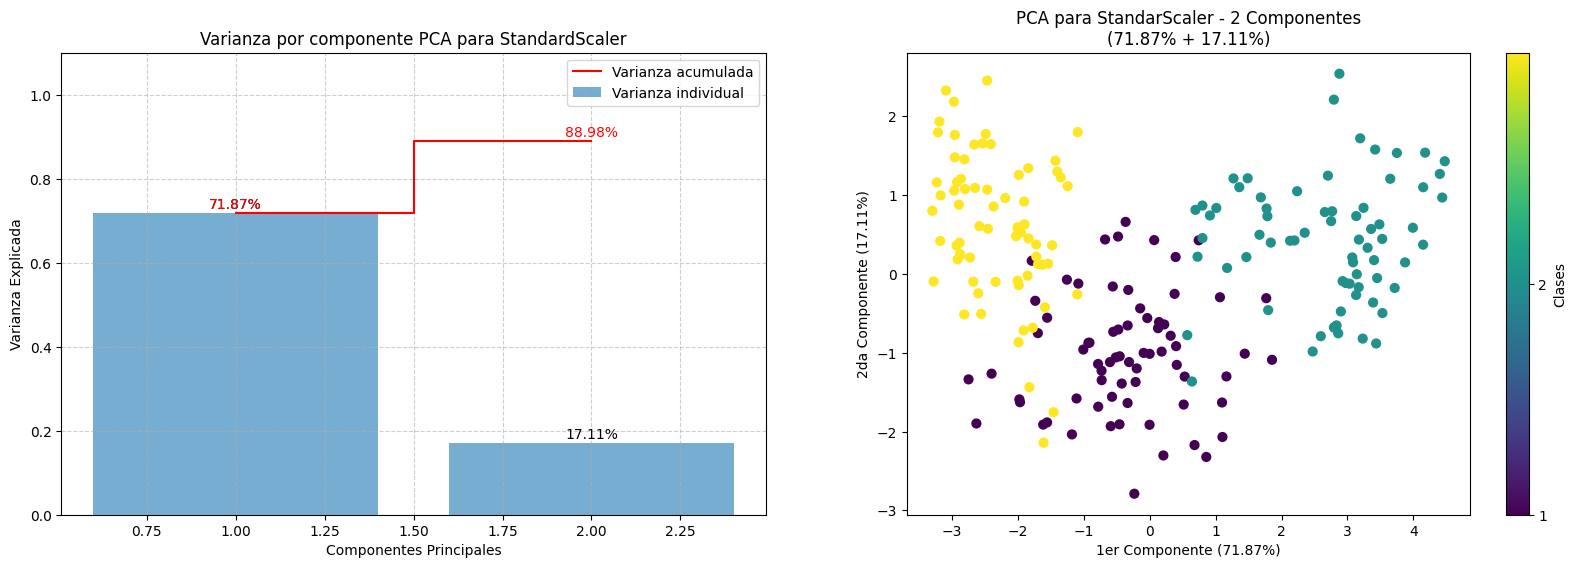

In [ ]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Siempre escalar antes de PCA
    ('pca', PCA(n_components=2))
])

# Ajustar y transformar
X_reduced = pipeline.fit_transform(X)
pca = pipeline.named_steps['pca']

# Varianza explicada y acumulada
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Ajustar el espacio entre subplots (wspace: espacio horizontal)
plt.subplots_adjust(wspace=0.2)  # Aument√° el valor para m√°s separaci√≥n

# Plot de Varianza Explicada
axes[0].bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.6, label='Varianza individual')
axes[0].step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid', color='red', label='Varianza acumulada')

for i, (ev, cv) in enumerate(zip(explained_variance, cumulative_variance)):
    axes[0].text(i + 1, ev + 0.01, f"{ev:.2%}", ha='center')
    axes[0].text(i + 1, cv + 0.01, f"{cv:.2%}", ha='center', color='red')

axes[0].set_xlabel('Componentes Principales')
axes[0].set_ylabel('Varianza Explicada')
axes[0].set_title('Varianza por componente PCA para StandardScaler')
axes[0].legend(loc='best')
axes[0].set_ylim(0, 1.1)
axes[0].grid(True, linestyle='--', alpha=0.6)

# Plot de PCA (scatter)
scatter = axes[1].scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, s=40, cmap='viridis')
axes[1].set_title(f'PCA para StandarScaler - 2 Componentes\n({explained_variance[0]:.2%} + {explained_variance[1]:.2%})')
axes[1].set_xlabel(f'1er Componente ({explained_variance[0]:.2%})')
axes[1].set_ylabel(f'2da Componente ({explained_variance[1]:.2%})')

# Barra de color
fig.colorbar(scatter, ax=axes[1], ticks=range(3), label='Clases')
plt.show()


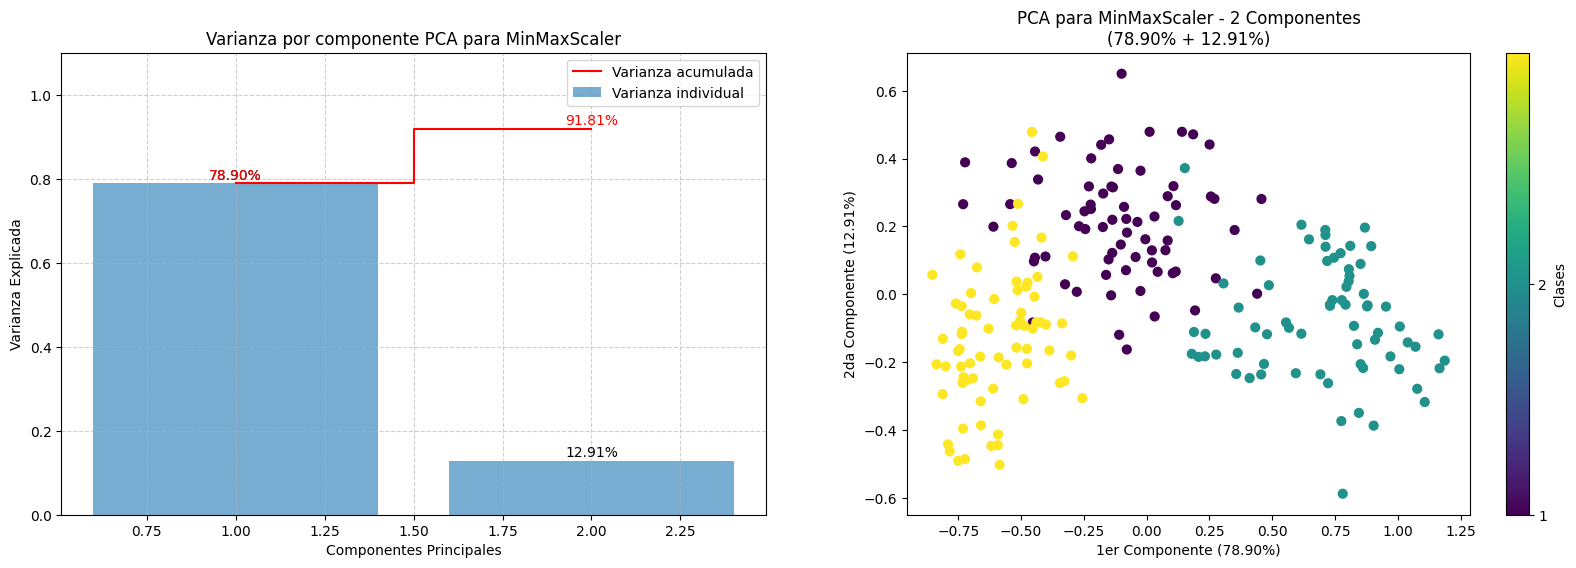

In [ ]:
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),  # Siempre escalar antes de PCA
    ('pca', PCA(n_components=2))
])

# Ajustar y transformar
X_reduced = pipeline.fit_transform(X)
pca = pipeline.named_steps['pca']

# Varianza explicada y acumulada
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Ajustar el espacio entre subplots (wspace: espacio horizontal)
plt.subplots_adjust(wspace=0.2)  # Aument√° el valor para m√°s separaci√≥n

# Plot de Varianza Explicada
axes[0].bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.6, label='Varianza individual')
axes[0].step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid', color='red', label='Varianza acumulada')

for i, (ev, cv) in enumerate(zip(explained_variance, cumulative_variance)):
    axes[0].text(i + 1, ev + 0.01, f"{ev:.2%}", ha='center')
    axes[0].text(i + 1, cv + 0.01, f"{cv:.2%}", ha='center', color='red')

axes[0].set_xlabel('Componentes Principales')
axes[0].set_ylabel('Varianza Explicada')
axes[0].set_title('Varianza por componente PCA para MinMaxScaler')
axes[0].legend(loc='best')
axes[0].set_ylim(0, 1.1)
axes[0].grid(True, linestyle='--', alpha=0.6)

# Plot de PCA (scatter)
scatter = axes[1].scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, s=40, cmap='viridis')
axes[1].set_title(f'PCA para MinMaxScaler - 2 Componentes\n({explained_variance[0]:.2%} + {explained_variance[1]:.2%})')
axes[1].set_xlabel(f'1er Componente ({explained_variance[0]:.2%})')
axes[1].set_ylabel(f'2da Componente ({explained_variance[1]:.2%})')

# Barra de color
fig.colorbar(scatter, ax=axes[1], ticks=range(3), label='Clases')
plt.show()


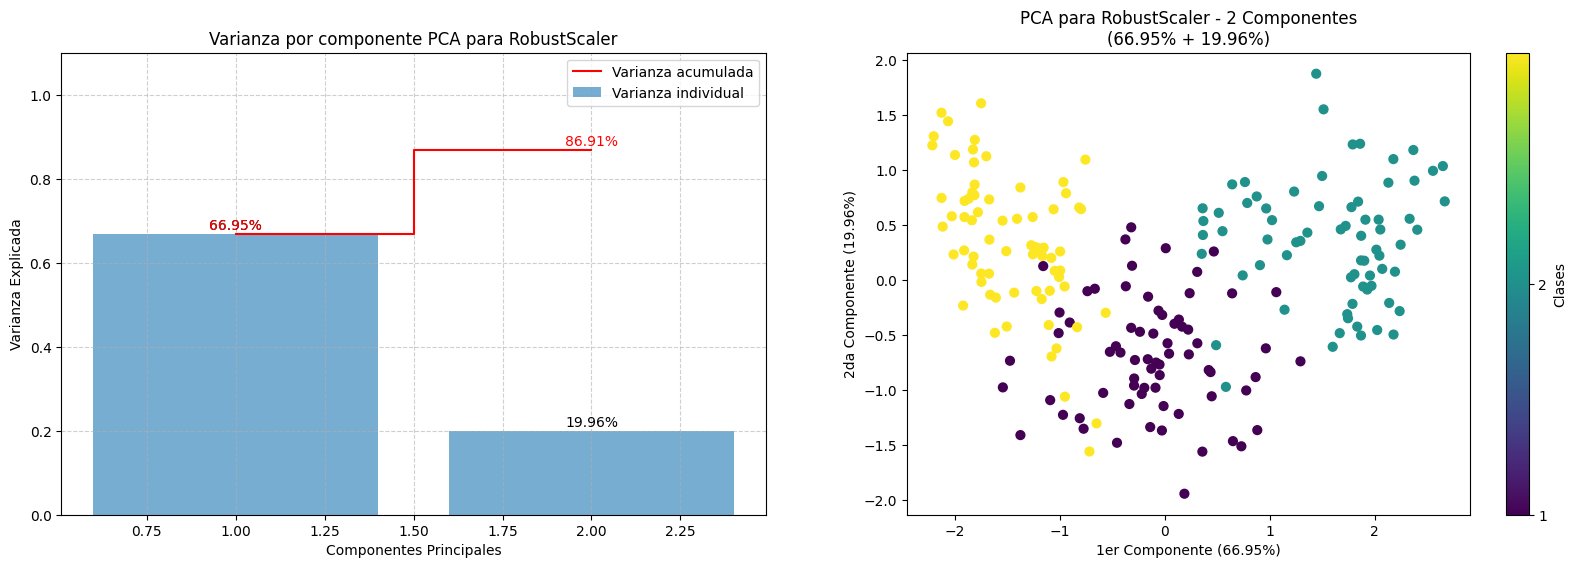

In [ ]:
pipeline = Pipeline([
    ('scaler', RobustScaler()),  # Siempre escalar antes de PCA
    ('pca', PCA(n_components=2))
])

# Ajustar y transformar
X_reduced = pipeline.fit_transform(X)
pca = pipeline.named_steps['pca']

# Varianza explicada y acumulada
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Ajustar el espacio entre subplots (wspace: espacio horizontal)
plt.subplots_adjust(wspace=0.2)  # Aument√° el valor para m√°s separaci√≥n

# Plot de Varianza Explicada
axes[0].bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.6, label='Varianza individual')
axes[0].step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid', color='red', label='Varianza acumulada')

for i, (ev, cv) in enumerate(zip(explained_variance, cumulative_variance)):
    axes[0].text(i + 1, ev + 0.01, f"{ev:.2%}", ha='center')
    axes[0].text(i + 1, cv + 0.01, f"{cv:.2%}", ha='center', color='red')

axes[0].set_xlabel('Componentes Principales')
axes[0].set_ylabel('Varianza Explicada')
axes[0].set_title('Varianza por componente PCA para RobustScaler')
axes[0].legend(loc='best')
axes[0].set_ylim(0, 1.1)
axes[0].grid(True, linestyle='--', alpha=0.6)

# Plot de PCA (scatter)
scatter = axes[1].scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, s=40, cmap='viridis')
axes[1].set_title(f'PCA para RobustScaler - 2 Componentes\n({explained_variance[0]:.2%} + {explained_variance[1]:.2%})')
axes[1].set_xlabel(f'1er Componente ({explained_variance[0]:.2%})')
axes[1].set_ylabel(f'2da Componente ({explained_variance[1]:.2%})')

# Barra de color
fig.colorbar(scatter, ax=axes[1], ticks=range(3), label='Clases')
plt.show()

Despu√©s de visualizar los resultados obtenidos mediante el uso de PCA, se puede verificar los diferentes valores de varianza y varianza acumulada seg√∫n el n√∫mero de componentes que se consideren. Para el caso de nuestro ejercicio, se considera que el n√∫mero de componenetes a considerar es de 2, lo cual permite visiauizar los resutados en dos dimensiones.

Analizando los resultados anteriores podemos afirmar que aquel escalador con mejor varianza acumulada y el cual utilizaremos para aplicar las t√©cnicas de Clustering es el MinMaxScaler con un 91.81%

# **3. T√âCNICAS DE CLUSTERING**

---

Una vez se ha obtenido el mejor m√©todo de escalado para nuestro cluster, ahora es necesario establecer la mejor de las t√©cnicas de clustering para determinar agrupaciones significativas en los datos y los cuales permitan establecer a qu√© clase pertence cada uno.

Para ello, analizaremos y discutiremos los m√©todos K-Means, DBSCAN y el Clustering Jerarquico con diferentes valores para sus par√°metros m√°s importantes, buscando aquel con el que se obtenga un mejor resultado. Por ello, iniciaremos con el algoritmo de K-Means.

## **3.1. K-Means**

---

En este apartado analizaremos y discuteremos los aspectos m√°s importantes del algoritmo de clustering de K-Means y verificaremos que cu√°l de los resultados es el mejor dados unos par√°metros, de tal manera de poder compararlos con los resultados del resto de algoritmos.

### **3.1.1. Modificaci√≥n de Hiperpar√°metros**

---

Antes de comenzar con el proceso de comparaci√≥n de resultados, es necesario conocer los hiperpar√°metros que tiene el algoritmo, de tal forma de buscar una modificaci√≥n id√≥nea que permita desvelar un resultado.

- `n_clusters`: determina el n√∫mero *ùêæ* de clusters que se van a generar.
- `init`: estrategia para asignar los centroides iniciales. Por defecto se emplea 'k-means++', una estrategia que trata de alejar los centroides lo m√°ximo posible facilitando la convergencia. Sin embargo, esta estrategia puede ralentizar el proceso cuando hay muchos datos, si esto ocurre, es mejor utilizar 'random'.
- `n_init`: determina el n√∫mero de veces que se va a repetir el proceso, cada vez con una asignaci√≥n aleatoria inicial distinta. Es recomendable que este √∫ltimo valor sea alto, entre 10-25, para no obtener resultados sub√≥ptimos debido a una iniciaci√≥n poco afortunada del proceso.
- `max_iter`: n√∫mero m√°ximo de iteraciones permitidas.
- `random_state`: semilla para garantizar la reproducibilidad de los resultados.

Sabiendo esta informaci√≥n y tal como se nos indicado, procederemos a modificar el hiperpar√°metro correspondiente al n√∫mero de clusters `n_clusters` a trav√©s de los procesos del M√©todo del Codo y el M√©todo de la Silueta, para posteriormente discutir los resultados obtenidos y definir un valor para este hiperpar√°metro.

####  **3.1.1.a. M√©todo del Codo (Elbow Method)**

---

Para determinar cu√°l es el n√∫mero de clusters que se van a generar para permitir conocer cual valor es el mejor valor para el cluster. La idea es obtener para valor de K la suma de los cuadrados de la distancia de cada punto con el centroide al que se encuentra asignado (se obtiene de `.inertia_`), siendo esta una medida de lo coherentes que son internamente los clusters.

La idea es que si K crece, el valor de `.inertia_` es menor porque cada cluster es m√°s peque√±o. Sin embargo, a partir de cierto punto, la adici√≥n de m√°s clusters proporciona rendimientos decrecientes en t√©rminos de reducci√≥n de `.inertia_`, y la tasa de disminuci√≥n se ralentiza, formando un codo en el gr√°fico. Ese ser√≠a el valor √≥ptimo para seleccionar.

Para ello establecemos un rango de valores en el que puede estar `n_clusters` y utilizamos el mejor scaler del apartado anterior y el cual seleccionamos.

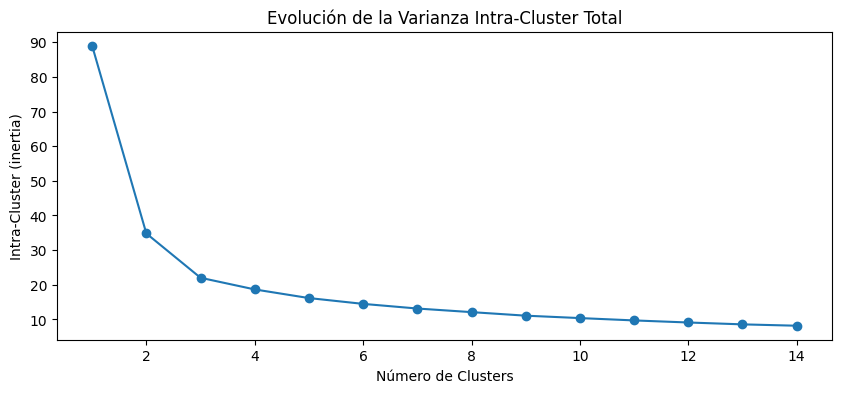

In [ ]:
# Elbow Method
# Rango de clusters a evaluar
range_n_clusters = range(1, 15)
inertias = []

for n_clusters in range_n_clusters:
    pipeline = Pipeline([
        ('scaler', MinMaxScaler()),
        ('kmeans', KMeans(
            n_clusters   = n_clusters,
            n_init       = 20,
            random_state = 100477706
        ))
    ])

    pipeline.fit(X)
    # Obtener la inercia del modelo KMeans
    inertia = pipeline.named_steps['kmeans'].inertia_
    inertias.append(inertia)

# Graficar la curva del m√©todo del codo
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
ax.plot(range_n_clusters, inertias, marker='o')
ax.set_title("Evoluci√≥n de la Varianza Intra-Cluster Total")
ax.set_xlabel('N√∫mero de Clusters')
ax.set_ylabel('Intra-Cluster (inertia)');

Como se puede observar en la gr√°fica, el punto en el cual se empieza a ralentizar el decrecimiento de la `.inertia_` es cuando el n√∫mero de clusters es igual a 3. A partir de dicho punto, el decrecimiento es constante y ralentizado, lo cual indica que el punto de codo o punto √≥ptimo es cuando `n_clusters` es igual a 3 (K=3).

####  **3.1.1.b. M√©todo de la Silueta (Silhouette Method)**

---

A pesar de nosotros observar claramente cu√°l es el punto √≥ptimo con el m√©todo del codo, podemos confirmar nuestra conclusi√≥n con el uso del m√©todo de la silueta. Este m√©todo se utiliza en muchas ocasiones cuando el m√©todo del codo no nos otorga un resultado claro del n√∫mero √≥ptimo de clusters.

Este m√©todo utiliza la distancia media intracl√∫ster y la distancia media cl√∫ster m√°s cercano para cada muestra, para que cuanto mayor sea el valor de la puntuaci√≥n, mejor sea la estimaci√≥n. Normalmente, las puntuaciones de silhoutte suben y luego bajan hasta alcanzar un n√∫mero √≥ptimo de clusters, por lo que observaremos que los valores se sit√∫an entre -1,0 y 1,0.

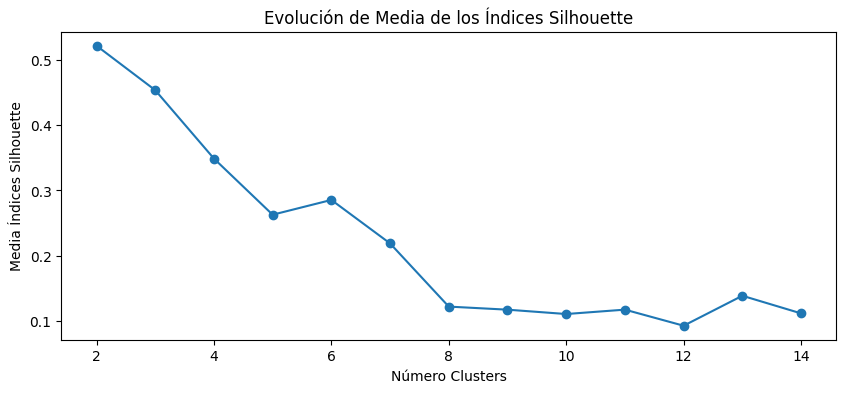

In [ ]:
# Silhouette Method
# Rango de clusters a evaluar
range_n_clusters = range(2, 15)
valores_medios_silhouette = []

for n_clusters in range_n_clusters:
    pipeline = Pipeline([
        ('scaler', MinMaxScaler()),
        ('kmeans', KMeans(
            n_clusters   = n_clusters,
            n_init       = 20,
            random_state = 100477706
        ))
    ])

    # Obtener la inercia del modelo KMeans
    cluster_labels = pipeline.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    valores_medios_silhouette.append(silhouette_avg)

# Graficar la curva del m√©todo del codo
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
ax.plot(range_n_clusters, valores_medios_silhouette, marker='o')
ax.set_title("Evoluci√≥n de Media de los √çndices Silhouette")
ax.set_xlabel('N√∫mero Clusters')
ax.set_ylabel('Media √çndices Silhouette');

Como se puede observar el mejor n√∫mero de clusters para este apartado es cuando K=2, ya que es el punto que tiene el valor m√°s alto de la representaci√≥n gr√°fica.

####  **3.1.1.c. Conclusi√≥n de la Modificaci√≥n**

Despu√©s de realizar las pertinenetes verificaciones con el uso de las dos t√©cnicas antes mencionadas podemos concluir que existe una leve diferencia entre ambos m√©todos, ya que los resultados son diferentes. Sin embargo, a modo de an√°lisis podemos decir que con un n√∫mero de 3 clusters, el resultado del m√©todo de la silueta es igual de bueno, aunque no es tan √≥ptimo.

Si nosotros afirmamos eso, podemos lograr que ambos resultados se contrasten y por lo tanto eliminar la diferencia de resltados. Esto logra que podamos afirmar que con un n√∫mero de 3 clusters se puede obtener el mejor resultado que es afirmado por ambos m√©todos.

### **3.1.2. Resultado Final del K-Means**

---

Una vez conclu√≠do el apartado anterior, entonces podemos aplicar el m√©todo K-Means teniendo en cuenta que utilizaremos 3 clusters como par√°metro para su producci√≥n.

Para mostrar el c√≥mo se han distribuido los datos seg√∫n el n√∫mero de clusters, utilizaremos dos plots, en los cuales podremos observar la distribuci√≥n y la ubicaci√≥n de los centroides en los grupos.

In [ ]:
# Pipeline: escalado + k-means con k=3
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('kmeans', KMeans(n_clusters=3, n_init=20, random_state=100477706))
])

# Entrenamiento del modelo
pipeline.fit(X)

# Predicci√≥n de etiquetas de cluster
y_predict = pipeline.predict(X)

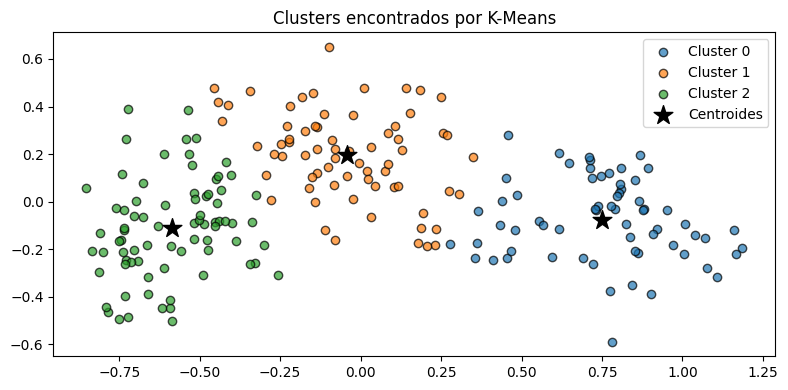

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reducimos los datos escalados a 2D con PCA para visualizaci√≥n
X_scaled = pipeline.named_steps['scaler'].transform(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Obtenemos etiquetas y centroides
y_predict = pipeline.predict(X)
centroides = pipeline.named_steps['kmeans'].cluster_centers_
centroides_pca = pca.transform(centroides)  # Centroides en espacio PCA

# Gr√°fico
plt.figure(figsize=(8, 4))
for i in np.unique(y_predict):
    plt.scatter(
        X_pca[y_predict == i, 0],
        X_pca[y_predict == i, 1],
        label=f'Cluster {i}',
        edgecolor='black',
        alpha=0.7
    )

# Centroides
plt.scatter(
    centroides_pca[:, 0],
    centroides_pca[:, 1],
    c='black',
    s=200,
    marker='*',
    label='Centroides'
)

plt.title('Clusters encontrados por K-Means')
plt.legend()
plt.tight_layout()
plt.show()


Podemos ver tambi√©n el n√∫mero de aciertos y errores. Podemos verlo como una matriz de confusi√≥n. Aqu√≠ hay que tener cuidado que Kmeans asigna un cluster cuyo n√∫mero puede ser distinto. Por lo tanto, cada fila tiene que tener un n√∫mero alto (aciertos) y en las dem√°s posiciones valores bajos (errores de clasificaci√≥n)

In [ ]:
# Matriz de confusi√≥n: grupos originales vs clusters creados
pd.crosstab(y, y_predict, dropna=False, rownames=['grupo_real'], colnames=['cluster'])

cluster      0   1   2
grupo_real            
1            2  58  10
2           62   8   0
3            0   3  67

## **3.2. Cluster Jer√°rquico**

---